In [1]:
data = [
    {'age': 33, 'sex': 'F', 'BP': 'high', 'cholesterol': 'high', 'Na': 0.66, 'K': 0.06, 'drug': 'A'},
    {'age': 77, 'sex': 'F', 'BP': 'high', 'cholesterol': 'normal', 'Na': 0.19, 'K': 0.03, 'drug': 'D'},
    {'age': 88, 'sex': 'M', 'BP': 'normal', 'cholesterol': 'normal', 'Na': 0.80, 'K': 0.05, 'drug': 'B'},
    {'age': 39, 'sex': 'F', 'BP': 'low', 'cholesterol': 'normal', 'Na': 0.19, 'K': 0.02, 'drug': 'C'},
    {'age': 43, 'sex': 'M', 'BP': 'normal', 'cholesterol': 'high', 'Na': 0.36, 'K': 0.03, 'drug': 'D'},
    {'age': 82, 'sex': 'F', 'BP': 'normal', 'cholesterol': 'normal', 'Na': 0.09, 'K': 0.09, 'drug': 'C'},
    {'age': 40, 'sex': 'M', 'BP': 'high', 'cholesterol': 'normal', 'Na': 0.89, 'K': 0.02, 'drug': 'A'},
    {'age': 88, 'sex': 'M', 'BP': 'normal', 'cholesterol': 'normal', 'Na': 0.80, 'K': 0.05, 'drug': 'B'},
    {'age': 29, 'sex': 'F', 'BP': 'high', 'cholesterol': 'normal', 'Na': 0.35, 'K': 0.04, 'drug': 'D'},
    {'age': 53, 'sex': 'F', 'BP': 'normal', 'cholesterol': 'normal', 'Na': 0.54, 'K': 0.06, 'drug': 'C'},
    {'age': 36, 'sex': 'F', 'BP': 'high', 'cholesterol': 'high', 'Na': 0.53, 'K': 0.05, 'drug': 'A'},
    {'age': 63, 'sex': 'M', 'BP': 'low', 'cholesterol': 'high', 'Na': 0.86, 'K': 0.09, 'drug': 'B'},
    {'age': 60, 'sex': 'M', 'BP': 'low', 'cholesterol': 'normal', 'Na': 0.66, 'K': 0.04, 'drug': 'C'},
    {'age': 55, 'sex': 'M', 'BP': 'high', 'cholesterol': 'high', 'Na': 0.82, 'K': 0.04, 'drug': 'B'},
    {'age': 35, 'sex': 'F', 'BP': 'normal', 'cholesterol': 'high', 'Na': 0.27, 'K': 0.03, 'drug': 'D'},
    {'age': 23, 'sex': 'F', 'BP': 'high', 'cholesterol': 'high', 'Na': 0.55, 'K': 0.08, 'drug': 'A'},
    {'age': 49, 'sex': 'F', 'BP': 'low', 'cholesterol': 'normal', 'Na': 0.27, 'K': 0.05, 'drug': 'C'},
    {'age': 27, 'sex': 'M', 'BP': 'normal', 'cholesterol': 'normal', 'Na': 0.77, 'K': 0.02, 'drug': 'B'},
    {'age': 51, 'sex': 'F', 'BP': 'low', 'cholesterol': 'high', 'Na': 0.20, 'K': 0.02, 'drug': 'D'},
    {'age': 38, 'sex': 'M', 'BP': 'high', 'cholesterol': 'normal', 'Na': 0.78, 'K': 0.05, 'drug': 'A'}
]

In [2]:
target = [d['drug'] for d in data]

In [3]:
target

['A',
 'D',
 'B',
 'C',
 'D',
 'C',
 'A',
 'B',
 'D',
 'C',
 'A',
 'B',
 'C',
 'B',
 'D',
 'A',
 'C',
 'B',
 'D',
 'A']

In [4]:
[d.pop('drug') for d in data];

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [6]:
age = [d['age'] for d in data]

In [7]:
age

[33,
 77,
 88,
 39,
 43,
 82,
 40,
 88,
 29,
 53,
 36,
 63,
 60,
 55,
 35,
 23,
 49,
 27,
 51,
 38]

In [8]:
sodium = [d['Na'] for d in data]

In [9]:
potassium = [d['K'] for d in data]

(0.0, 0.12)

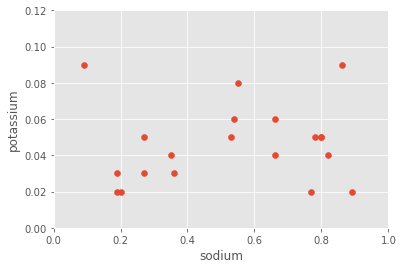

In [10]:
plt.scatter(sodium, potassium)
plt.xlabel('sodium')
plt.ylabel('potassium')
plt.xlim(0, 1)
plt.ylim(0, 0.12)

In [11]:
target = [ord(t) - 65 for t in target]

In [12]:
target

[0, 3, 1, 2, 3, 2, 0, 1, 3, 2, 0, 1, 2, 1, 3, 0, 2, 1, 3, 0]

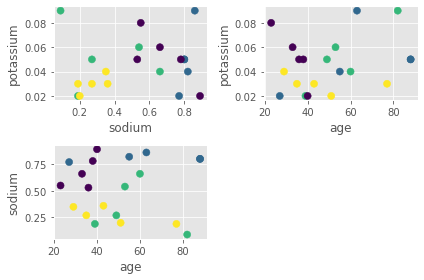

In [13]:
plt.subplot(221)
plt.scatter(sodium, potassium, c=target, s=50)
plt.xlabel('sodium')
plt.ylabel('potassium')
plt.subplot(222)
plt.scatter(age, potassium, c=target, s=50)
plt.xlabel('age')
plt.ylabel('potassium')
plt.subplot(223)
plt.scatter(age, sodium, c=target, s=50)
plt.xlabel('age')
plt.ylabel('sodium')
plt.tight_layout()

In [14]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False)
data_pre = vec.fit_transform(data)

In [15]:
data_pre[0]

array([ 1.  ,  0.  ,  0.  ,  0.06,  0.66, 33.  ,  1.  ,  0.  ,  1.  ,
        0.  ])

In [16]:
import numpy as np
data_pre = np.array(data_pre, dtype=np.float32)
target = np.array(target, dtype=np.float32)

In [17]:
import sklearn.model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(data_pre, target, test_size=5, random_state=42)

In [18]:
# import cv2
# It appears the DTrees object in OpenCV 3.1 is 
# broken (segmentation fault). As a result, calling the train method will lead to 
# dtree = cv2.ml.DTrees_create()
# dtree.train(X_train, cv2.ml.ROW_SAMPLE, y_train)
# y_pred = dtree.predict(X_test)

In [19]:
from sklearn import tree

In [89]:
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=4)

In [90]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=4)

In [91]:
dtc.score(X_train, y_train)

1.0

In [92]:
dtc.score(X_test, y_test)

0.6

In [65]:
# 在命令行敲下面代码
# conda install graphviz

In [66]:
with open("tree.dot", 'w') as f:
    f = tree.export_graphviz(dtc, out_file=f)

In [67]:
dtc.feature_importances_

array([0.12242733, 0.        , 0.        , 0.18009952, 0.5105994 ,
       0.18687375, 0.        , 0.        , 0.        , 0.        ])

<BarContainer object of 10 artists>

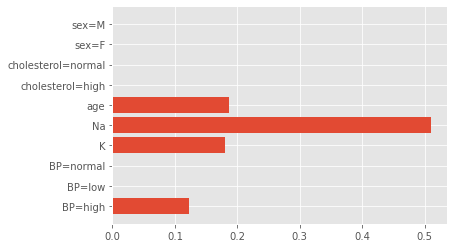

In [68]:
plt.barh(range(len(dtc.feature_importances_)), dtc.feature_importances_, align='center', tick_label=vec.get_feature_names())